In [8]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np


---

In [9]:
def createPlot(pos=0,img_channel=None,img_color='k',label='Error'):
    arreglo_plots[pos,0].set_title(label)
    arreglo_plots[pos,0].imshow(img_channel, cmap="gray")
    arreglo_plots[pos,1].set_title('Histograma '+ label)
    img_array_i = img_channel.ravel()
    arreglo_plots[pos,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=img_color);

In [21]:
def show_every_color(img_rgb,arreglo_plots):
    

    ##########################################################################################
    #Espacio de color RGB

    ##
    img_R_RGB = img_rgb[:,:,0]
    img_G_RGB = img_rgb[:,:,1]
    img_B_RGB = img_rgb[:,:,2]
    ##
    createPlot(0,img_R_RGB,'r','Canal R (RGB) - img_R_RGB')
    createPlot(1,img_G_RGB,'g','Canal G (RGB) - img_G_RGB')
    createPlot(2,img_B_RGB,'b','Canal B (RGB) - img_B_RGB')


    ##########################################################################################
    # #Espacio de color CMY
    ##
    img_C_CMY = 255 - img_rgb[:,:,0]
    img_M_CMY = 255 - img_rgb[:,:,1]
    img_Y_CMY = 255 - img_rgb[:,:,2]
    ##

    createPlot(3,img_C_CMY,'r','Canal C (CMY) - img_C_CMY')
    createPlot(4,img_M_CMY,'g','Canal M (CMY) - img_M_CMY')
    createPlot(5,img_Y_CMY,'b','Canal Y (CMY) - img_Y_CMY')
    ##########################################################################################
    #Espacio de color YIQ
    img_Y_YIQ = 0.299*img_R_RGB + 0.587*img_G_RGB + 0.114*img_B_RGB
    img_I_YIQ = 0.596*img_R_RGB - 0.274*img_G_RGB - 0.322*img_B_RGB
    img_Q_YIQ = 0.211*img_R_RGB - 0.523*img_G_RGB + 0.312*img_B_RGB

    createPlot(6,img_Y_YIQ,'r','Canal Y (YIQ) - img_Y_YIQ')
    createPlot(7,img_I_YIQ,'g','Canal I (YIQ) - img_I_YIQ')
    createPlot(8,img_Q_YIQ,'b','Canal Q (YIQ) - img_Q_YIQ')
    ##########################################################################################
    #Espacio de color LAB
    ##
    img_lab  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
    img_L_LAB = img_lab[:,:,0]
    img_A_LAB = img_lab[:,:,1]
    img_B_LAB = img_lab[:,:,2]
    ##
    createPlot(9 ,img_L_LAB,'r','Canal L (LAB) - img_L_LAB')
    createPlot(10,img_A_LAB,'g','Canal A (LAB) - img_A_LAB')
    createPlot(11,img_B_LAB,'b','Canal B (LAB) - img_B_LAB')

    ##########################################################################################
    # #Espacio de color YUV
    img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

    img_Y_YUV = img_yuv[:,:,0]
    img_U_YUV =  img_yuv[:,:,1]
    img_V_YUV = img_yuv[:,:,2]

    createPlot(12,img_Y_YUV,'r','Canal Y (YUV) - img_Y_YUV')
    createPlot(13,img_U_YUV,'g','Canal U (YUV) - img_U_YUV')
    createPlot(14,img_V_YUV,'b','Canal V (YUV) - img_V_YUV')

    ##########################################################################################
    # #Espacio de color HSV
    ##
    hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
    img_h_hsv = hsv[:, :, 0]
    img_s_hsv = hsv[:, :, 1]
    img_v_hsv = hsv[:, :, 2]
    # ##
    createPlot(15,img_h_hsv,'r','Canal H (HSV) - img_h_hsv')
    createPlot(16,img_s_hsv,'g','Canal S (HSV) - img_s_hsv')
    createPlot(17,img_v_hsv,'b','Canal V (HSV) - img_v_hsv')

    ##########################################################################################
    # #Espacio de color HLS
    ##
    HLS= cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HLS)
    img_H_HLS = HLS[:, :, 0]
    img_L_HLS = HLS[:, :, 1]
    img_S_HLS = HLS[:, :, 2]
    ##
    createPlot(18,img_H_HLS,'r','Canal H (HLS) - img_H_HLS')
    createPlot(19,img_L_HLS,'g','Canal L (HLS) - img_L_HLS')
    createPlot(20,img_S_HLS,'b','Canal S (HLS) - img_S_HLS')

    ##########################################################################################
    # #Espacio de color xyz
    img_xyz  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ)
    img_X_XYZ = img_xyz[:,:,0]
    img_Y_XYZ = img_xyz[:,:,1]
    img_Z_XYZ = img_xyz[:,:,2]

    createPlot(21,img_X_XYZ,'r','Canal X (XYZ) - img_X_XYZ')
    createPlot(22,img_Y_XYZ,'g','Canal Y (XYZ) - img_Y_XYZ')
    createPlot(23,img_Z_XYZ,'b','Canal Z (XYZ) - img_Z_XYZ')
    plt.show()

---

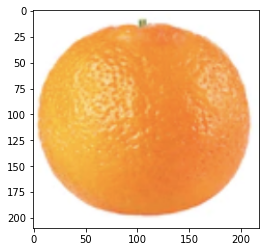

In [11]:
cwd = Path.cwd()
TRAIN_PATH = cwd / 'dataset'/ 'train' 
FRESH_PATH = TRAIN_PATH / 'freshoranges'

fresh_images = list(FRESH_PATH.glob('Screen Shot*.png'))
fresh_images = [image.relative_to(cwd) for image in fresh_images]

img = cv2.imread(str(fresh_images[0]),cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
# str(images[0])

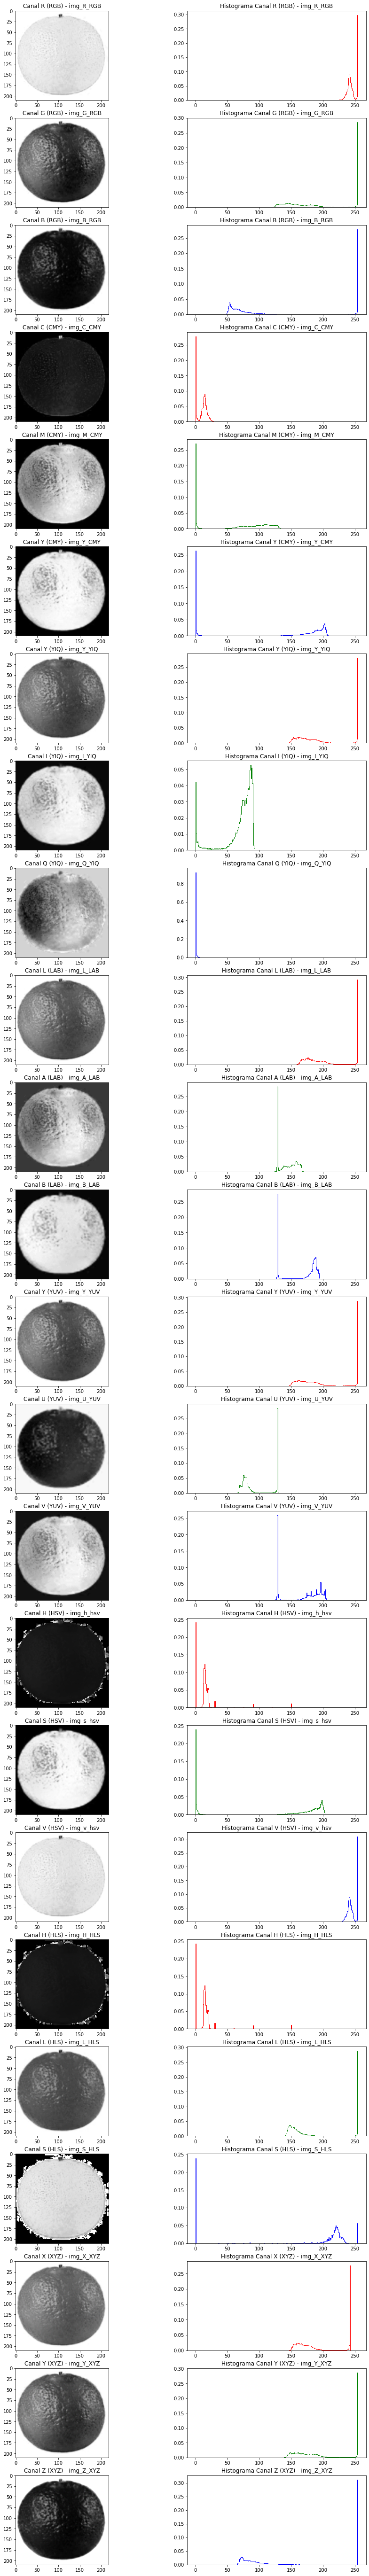

In [22]:
fig, arreglo_plots = plt.subplots(24,2, figsize=(15, 100))
show_every_color(img,arreglo_plots)

---

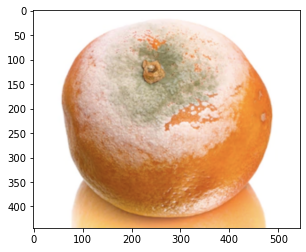

In [23]:
ROTTEN_PATH = TRAIN_PATH / 'rottenoranges'

rotten_images = list(ROTTEN_PATH.glob('Screen Shot*.png'))
rotten_images = [image.relative_to(cwd) for image in rotten_images]

img = cv2.imread(str(rotten_images[0]),cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

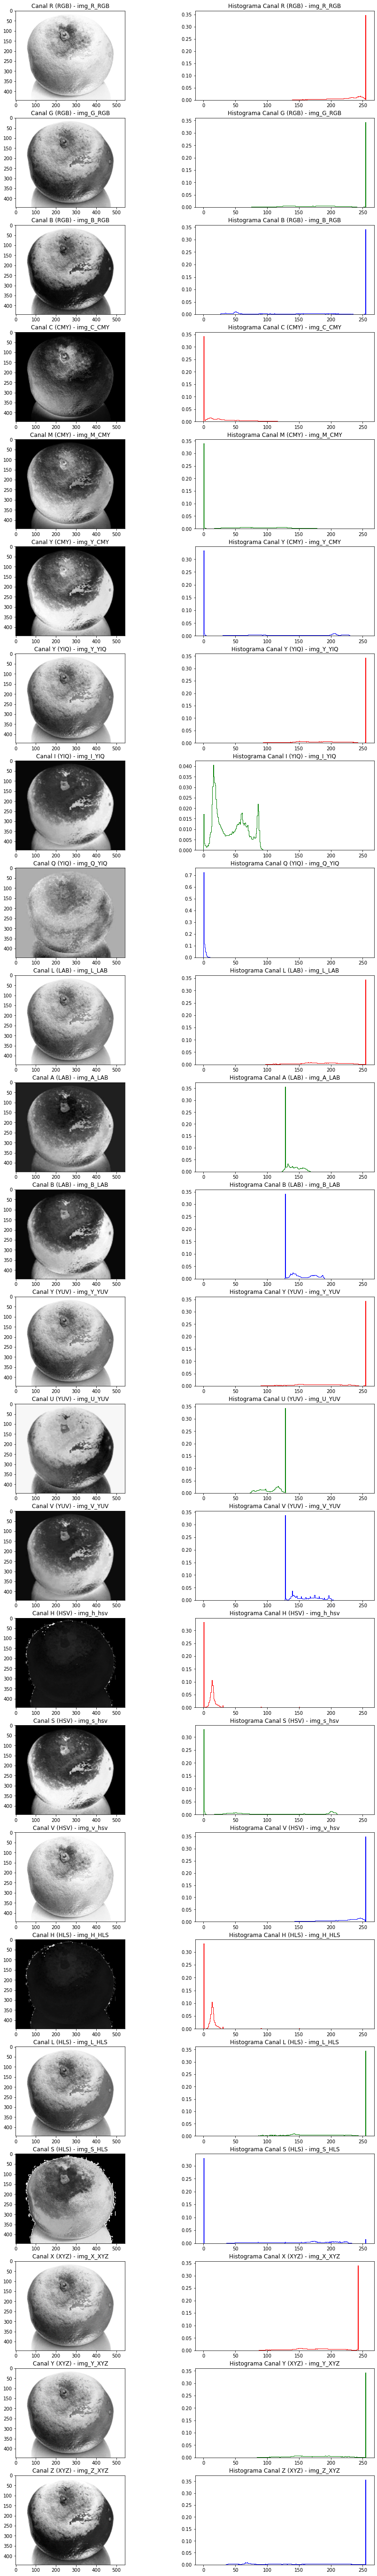

In [24]:
fig, arreglo_plots = plt.subplots(24,2, figsize=(15, 100))
show_every_color(img,arreglo_plots)